# Verify confident learning on CIFAR10

The author of CL claims that CIFAR10 has 275 label errors in the test set.

In [1]:
!pwd
!which python3

/media/laptq/data/workspace/miscellaneous/dcai
/media/laptq/data/workspace/miscellaneous/dcai/.venv_dcai/bin/python3


In [99]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2

ModuleNotFoundError: No module named 'cv2'

In [106]:
BATCHSIZE = 128
LR = 0.001
EPOCHS = 10
DEVICE = 'cuda:0'

In [100]:
device = torch.device(DEVICE)

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ]
)

trainset = torchvision.datasets.MNIST(
    root='./data', 
    train=True,
    download=True, 
    transform=transform
)
trainloader = DataLoader(
    trainset, 
    batch_size=BATCHSIZE,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.MNIST(
    root='./data', 
    train=False,
    download=True, 
    transform=transform
)
testloader = DataLoader(
    testset, 
    batch_size=BATCHSIZE,
    shuffle=False, 
    num_workers=2
)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes = [str(i) for i in range(10)]

# print image shape
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)


torch.Size([128, 1, 28, 28])


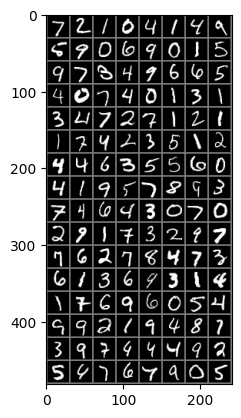

7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1     3     4     7     2     7     1     2     1     1     7     4     2     3     5     1     2     4     4     6     3     5     5     6     0     4     1     9     5     7     8     9     3     7     4     6     4     3     0     7     0     2     9     1     7     3     2     9     7     7     6     2     7     8     4     7     3     6     1     3     6     9     3     1     4     1     7     6     9     6     0     5     4     9     9     2     1     9     4     8     7     3     9     7     4     4     4     9     2     5     4     7     6     7     9     0     5    


In [101]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(BATCHSIZE)))

In [111]:
from torchvision.models import resnet18

net = resnet18(weights=None, num_classes=10)
net.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

net.eval().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9, nesterov=True)

net(torch.randn(4, 1, 32, 32).to(device))

tensor([[-0.0225,  0.6759,  0.5930, -0.3161, -1.6884,  0.6479,  0.1083,  1.3047,
         -0.6213, -0.0735],
        [-0.0185,  0.1693,  0.6357, -0.0778, -1.5777,  0.3861,  0.3979,  1.2953,
         -0.5296, -0.3857],
        [ 0.0134,  0.4545,  0.7154, -0.2253, -1.6784,  0.5461,  0.1485,  1.2300,
         -0.4424, -0.3232],
        [ 0.2100,  0.6733,  0.9368, -0.2553, -1.3289,  0.3564,  0.0278,  1.2324,
         -0.5091, -0.0726]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [112]:
step_size = 100
for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % step_size == (step_size - 1):    # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / step_size:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 1.228
[1,   200] loss: 0.254
[1,   300] loss: 0.163
[1,   400] loss: 0.141
[2,   100] loss: 0.093
[2,   200] loss: 0.089
[2,   300] loss: 0.082
[2,   400] loss: 0.083
[3,   100] loss: 0.062
[3,   200] loss: 0.065
[3,   300] loss: 0.065
[3,   400] loss: 0.061
[4,   100] loss: 0.052
[4,   200] loss: 0.054
[4,   300] loss: 0.048
[4,   400] loss: 0.051
[5,   100] loss: 0.040
[5,   200] loss: 0.038
[5,   300] loss: 0.046
[5,   400] loss: 0.042
[6,   100] loss: 0.037
[6,   200] loss: 0.034
[6,   300] loss: 0.036
[6,   400] loss: 0.039
[7,   100] loss: 0.030
[7,   200] loss: 0.033
[7,   300] loss: 0.032
[7,   400] loss: 0.033
[8,   100] loss: 0.027
[8,   200] loss: 0.027
[8,   300] loss: 0.027
[8,   400] loss: 0.028
[9,   100] loss: 0.024
[9,   200] loss: 0.026
[9,   300] loss: 0.028
[9,   400] loss: 0.023
[10,   100] loss: 0.020
[10,   200] loss: 0.022
[10,   300] loss: 0.022
[10,   400] loss: 0.022
Finished Training


In [113]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 99 %


In [114]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 99.7 %
Accuracy for class: 1     is 99.5 %
Accuracy for class: 2     is 99.3 %
Accuracy for class: 3     is 99.2 %
Accuracy for class: 4     is 99.0 %
Accuracy for class: 5     is 98.5 %
Accuracy for class: 6     is 99.6 %
Accuracy for class: 7     is 99.1 %
Accuracy for class: 8     is 98.9 %
Accuracy for class: 9     is 97.4 %


In [154]:
def self_confidence(
        **kwargs
):
    labels = kwargs['labels']
    pred_probs = kwargs['pred_probs']
    
    n_classes = len(pred_probs[0])

    sc_thresholds = [[] for _ in range(n_classes)]
    for label, probs in zip(labels, pred_probs):
        sc_thresholds[label].append(probs[label])
    
    sc_thresholds = [np.mean(_) for _ in sc_thresholds]
    return sc_thresholds


def compute_C_mat(
        **kwargs
):
    labels = kwargs['labels']
    pred_probs = kwargs['pred_probs']
    sc_thresholds = kwargs['sc_thresholds']

    n_classes = len(pred_probs[0])
    sc_thresholds = np.array(sc_thresholds)

    C_mat = np.zeros((n_classes, n_classes))
    bin_cat = []

    for y_tilde, probs in zip(labels, pred_probs):
        probs = np.array(probs)

        y_star = np.where((probs >= sc_thresholds) & (probs >= np.max(probs)))[0]
        
        bc = None

        assert len(y_star) <= 1
        if len(y_star) == 1:        
            y_star = y_star[0]
            if probs[y_star] >= sc_thresholds[y_star]:
                C_mat[y_tilde, y_star] += 1
                bc = (y_tilde, y_star)
        
        bin_cat.append(bc)      

    return C_mat, bin_cat


def compute_Q_mat(
        **kwargs
):
    labels = kwargs['labels']
    C_mat = kwargs['C_mat']

    labels = np.array(labels)

    Q_mat = np.zeros_like(C_mat)
    for y_tilde in range(C_mat.shape[0]):
        for y_star in range(C_mat.shape[1]):
            Q_mat[y_tilde, y_star] = C_mat[y_tilde, y_star] / np.sum(C_mat[y_tilde, :]) * len(np.where(labels == y_tilde)[0])
    Q_mat /= np.sum(Q_mat)

    return Q_mat


def rank_by_PBC(
        **kwargs
):
    labels = kwargs['labels']
    pred_probs = kwargs['pred_probs']
    Q_mat = kwargs['Q_mat']

    n_examples = len(labels)
    n_classes = len(pred_probs[0])

    ranked_label_issues = []
    for y_tilde in range(n_classes):
        n_issues = int((np.sum(Q_mat[y_tilde]) - Q_mat[y_tilde, y_tilde]) * n_examples)
        
        idx_examples = []
        score_examples = []
        for idx, (label, probs) in enumerate(zip(labels, pred_probs)):
            if label == y_tilde:
                idx_examples.append(idx)
                score_examples.append(probs[y_tilde])
        argsort = np.argsort(score_examples)
        ranked_idx_examples = [idx_examples[_] for _ in argsort][:n_issues]

        ranked_label_issues.append(ranked_idx_examples)
    
    return ranked_label_issues


def rank_by_PBNR(
        **kwargs
):
    labels = kwargs['labels']
    pred_probs = kwargs['pred_probs']
    Q_mat = kwargs['Q_mat']
    bin_cat = kwargs['bin_cat']

    n_examples = len(labels)
    n_classes = len(pred_probs[0])

    ranked_label_issues = [[] for _ in range(n_classes)]
    for y_tilde in range(n_classes):
        for y_star in range(n_classes):
            if y_tilde == y_star:
                continue
            n_issues = int(Q_mat[y_tilde, y_star] * n_examples)

            idx_examples = []
            score_examples = []
            for idx, (label, probs, bc) in enumerate(zip(labels, pred_probs, bin_cat)):
                if bc != (y_tilde, y_star):
                    continue
                assert label == y_tilde
                idx_examples.append(idx)
                score_examples.append(probs[y_tilde] - max(probs[_] for _ in range(n_classes) if _ != y_tilde))
            argsort = np.argsort(score_examples)
            ranked_idx_examples = [idx_examples[_] for _ in argsort][:n_issues]

            ranked_label_issues[y_tilde].extend(ranked_idx_examples)

    return ranked_label_issues


def find_label_issues(
        **kwargs
):
    labels = kwargs['labels']
    pred_probs = kwargs['pred_probs']
    return_indices_ranked_by = kwargs['return_indices_ranked_by']

    sc_thresholds = self_confidence(
        labels=labels,
        pred_probs=pred_probs,
    )

    C_mat, bin_cat = compute_C_mat(
        labels=labels,
        pred_probs=pred_probs,
        sc_thresholds=sc_thresholds
    )

    Q_mat = compute_Q_mat(
        labels=labels,
        C_mat=C_mat
    )

    if return_indices_ranked_by == 'PBC':
        ranked_label_issues = rank_by_PBC(
            labels=labels,
            pred_probs=pred_probs,
            Q_mat=Q_mat
        )
    elif return_indices_ranked_by == 'PBNR':
        ranked_label_issues = rank_by_PBNR(
            labels=labels,
            pred_probs=pred_probs,
            Q_mat=Q_mat,
            bin_cat=bin_cat
        )

    return ranked_label_issues


labels = []
pred_probs = []
with torch.no_grad():
    for data in testloader:
        images, labels_ = data
        images = images.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        labels.extend(labels_.numpy().tolist())
        pred_probs.extend(F.softmax(outputs, dim=1).cpu().numpy().tolist())
labels = np.array(labels)

# simulate label noise
labels[:100] = np.random.choice(10, size=100)

ranked_label_issues = find_label_issues(
    labels=labels,
    pred_probs=pred_probs,
    return_indices_ranked_by='PBNR'
)
print(ranked_label_issues)
corrected_labels = [[np.argmax(pred_probs[__]) for __ in _] for _ in ranked_label_issues]



[[89, 77, 24, 59, 66, 99], [47, 90, 19, 95, 78], [25, 68, 42, 8, 22, 91, 98, 83], [71, 57, 45, 15, 938, 26, 36], [14, 29, 82, 72, 93, 81, 11, 1112, 0, 60, 79, 16, 2130, 58, 73], [3, 74, 2, 40, 94, 2597, 2035, 65, 33, 50, 9729, 34, 97, 1299, 41, 720, 9], [13, 69, 46, 2654, 43, 23, 17, 64, 75], [39, 38, 1226, 9009, 87, 56, 48, 4, 84, 12, 20], [55, 28, 37, 31, 35, 63, 67, 6, 54, 21, 7], [5, 1, 32, 88, 80, 6571, 61]]


In [155]:
ranked_label_issues

[[89, 77, 24, 59, 66, 99],
 [47, 90, 19, 95, 78],
 [25, 68, 42, 8, 22, 91, 98, 83],
 [71, 57, 45, 15, 938, 26, 36],
 [14, 29, 82, 72, 93, 81, 11, 1112, 0, 60, 79, 16, 2130, 58, 73],
 [3, 74, 2, 40, 94, 2597, 2035, 65, 33, 50, 9729, 34, 97, 1299, 41, 720, 9],
 [13, 69, 46, 2654, 43, 23, 17, 64, 75],
 [39, 38, 1226, 9009, 87, 56, 48, 4, 84, 12, 20],
 [55, 28, 37, 31, 35, 63, 67, 6, 54, 21, 7],
 [5, 1, 32, 88, 80, 6571, 61]]

In [156]:
corrected_labels

[[1, 2, 4, 5, 6, 9],
 [2, 3, 4, 4, 9],
 [0, 3, 4, 5, 6, 6, 6, 7],
 [0, 1, 5, 5, 5, 7, 7],
 [1, 1, 2, 2, 3, 6, 6, 6, 7, 7, 7, 9, 9, 9, 9],
 [0, 1, 1, 1, 1, 3, 3, 4, 4, 6, 6, 7, 7, 7, 7, 8, 9],
 [0, 0, 1, 1, 2, 5, 7, 7, 7],
 [1, 2, 2, 2, 3, 4, 4, 4, 8, 9, 9],
 [0, 0, 1, 1, 2, 3, 4, 4, 6, 6, 9],
 [1, 2, 3, 6, 7, 7, 8]]

['1', '2', '3', '6', '7']


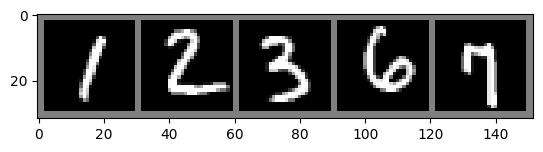

In [161]:
y_tilde = 9

print([classes[_] for _ in corrected_labels[y_tilde][:5]])
imgs = []
for idx in range(5):
    idx_example = ranked_label_issues[y_tilde][idx]
    img, _ = testset[idx_example]
    imgs.append(img)

imshow(torchvision.utils.make_grid(imgs))

[1299 2597 1112 2035 2654 1226 9009 2130 6571  720]


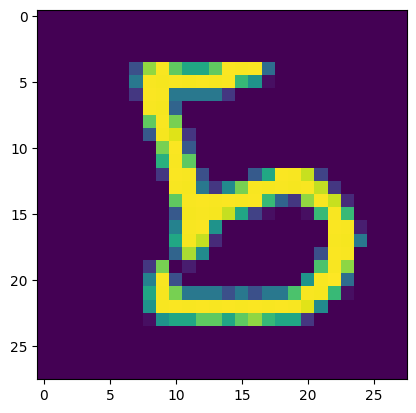

5


In [136]:
from cleanlab.filter import find_label_issues

ranked_label_issues = find_label_issues(
    labels=labels,
    pred_probs=np.array(pred_probs),
    return_indices_ranked_by='normalized_margin',
    filter_by='prune_by_noise_rate'
)

print(ranked_label_issues)

img, label = testset[ranked_label_issues[9]]

imshow(img)
print(classes[label])